In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from spacepy.pycdf import CDF as cdf
from scipy.stats import pearsonr
plt.rcParams["text.usetex"] = True

In [2]:
df1 = cdf("../Data_Raw/psp_esa_data/2018/psp_swp_spi_sf00_l3_mom_20181011_v04.cdf")
df1.keys

<bound method Mapping.keys of <CDF:
APID: CDF_UINT2 [38]
ARCH_BITS: CDF_UINT1 [38]
CNTS: CDF_FLOAT [38]
COMPR_RATIO: CDF_FLOAT [38]
DATASIZE: CDF_UINT4 [38]
DENS: CDF_FLOAT [38]
EFLUX_VS_ENERGY: CDF_FLOAT [38, 32]
EFLUX_VS_PHI: CDF_FLOAT [38, 8]
EFLUX_VS_THETA: CDF_FLOAT [38, 8]
ENERGY_VALS: CDF_FLOAT [38, 32]
Epoch: CDF_TIME_TT2000 [38]
F0: CDF_UINT2 [38]
GAP: CDF_UINT1 [38]
LTCSNNNN_BITS: CDF_UINT1 [38]
MAGF_INST: CDF_FLOAT [38, 3]
MAGF_SC: CDF_FLOAT [38, 3]
MET: CDF_DOUBLE [38]
MODE2: CDF_UINT2 [38]
MODE2_ORI: CDF_UINT2 [38]
NDAT: CDF_UINT4 [38]
NUM_ACCUM: CDF_UINT4 [38]
NUM_TOTAL: CDF_UINT4 [38]
PEAK_BIN: CDF_UINT1 [38]
PHI_VALS: CDF_FLOAT [38, 8]
PKT_SIZE: CDF_UINT4 [38]
PRODUCT_BITS: CDF_UINT1 [38]
QUALITY_FLAG: CDF_UINT2 [38]
QUAT_SC_TO_RTN: CDF_DOUBLE [38, 4]
ROTMAT_SC_INST: CDF_FLOAT [3, 3] NRV
SC_VEL_RTN_SUN: CDF_DOUBLE [38, 3]
SEQN: CDF_UINT2 [38]
SEQN_DELTA: CDF_UINT2 [38]
SEQN_GROUP: CDF_UINT1 [38]
SOURCE_APID: CDF_UINT2 [38]
SOURCE_HASH: CDF_UINT4 [38]
STATUS_BITS: CDF_UI

In [3]:
df2= cdf("../Data_Raw/psp_spc_data/2020/psp_swp_spc_l3i_20200109_v02.cdf")
df2.keys

<bound method Mapping.keys of <CDF:
DQF: CDF_INT1 [996, 32]
DQF_flagnames: CDF_CHAR*70 [32] NRV
Epoch: CDF_TIME_TT2000 [996]
HCI_LABL: CDF_CHAR*10 [3] NRV
RTN_FRAME: CDF_CHAR*10 [3] NRV
SC_frame: CDF_CHAR*10 [3] NRV
VHECI_LABL: CDF_CHAR*20 [3] NRV
array32_index: CDF_UINT1 [32] NRV
carr_latitude: CDF_REAL4 [996]
carr_longitude: CDF_REAL4 [996]
general_flag: CDF_INT1 [996]
n3_fit: CDF_REAL4 [996]
n3_fit_uncertainty: CDF_REAL4 [996]
na_fit: CDF_REAL4 [996]
na_fit_uncertainty: CDF_REAL4 [996]
np1_fit: CDF_REAL4 [996]
np1_fit_uncertainty: CDF_REAL4 [996]
np_fit: CDF_REAL4 [996]
np_fit_uncertainty: CDF_REAL4 [996]
np_moment: CDF_REAL4 [996]
np_moment_deltahigh: CDF_REAL4 [996]
np_moment_deltalow: CDF_REAL4 [996]
pop3_mtoq: CDF_REAL4 [996]
sc_pos_HCI: CDF_REAL4 [996, 3]
sc_vel_HCI: CDF_REAL4 [996, 3]
unit_velocity: CDF_CHAR*10 [3] NRV
v3_fit_RTN: CDF_REAL4 [996, 3]
v3_fit_RTN_LABL_1: CDF_CHAR*25 [3] NRV
v3_fit_RTN_uncertainty: CDF_REAL4 [996, 3]
v3_fit_RTN_uncertainty_LABL_1: CDF_CHAR*37 [3] 

In [ ]:
df_esa = pd.read_hdf("../Data_Processed/Individual/psp_esa_data/psp_esa_data_unbinned_20181002_20241031.hf")

Text(0.5, 1.0, 'Hour Averaged ESA Data')

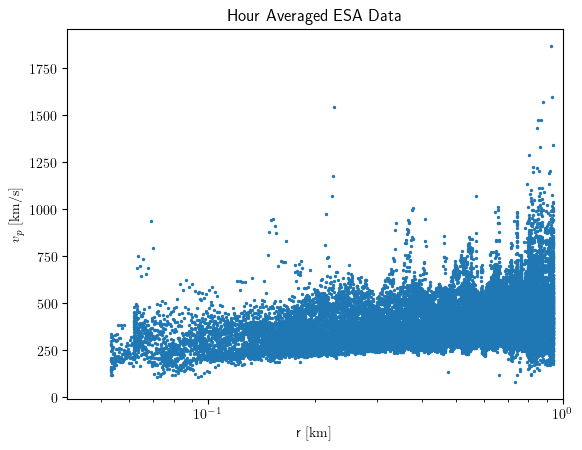

In [4]:
plt.scatter((df_esa["sc_r"] / 1.496e8), df_esa["vp_m"], s = 2)
plt.xscale("log")
plt.ylabel(r"$v_p~\rm [km/s]$")
plt.xlabel(r"r \rm [km]")
plt.xlim(.6e7 / 1.496e8, 1.5e8 / 1.496e8)
plt.title(r"Hour Averaged ESA Data")

In [5]:
df_spc = pd.read_hdf("../Data_Processed/Individual/psp_spc_data/psp_spc_data_unbinned_20181031_20241031.hf")

Text(0.5, 1.0, 'Hour Averaged SPC Data')

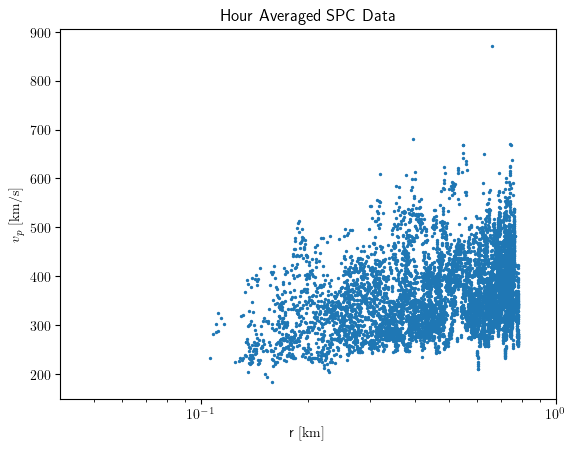

In [6]:
plt.scatter((df_spc["sc_r"] / 1.496e8), df_spc["vp_m"], s = 2)
plt.xscale("log")
plt.ylabel(r"$v_p~\rm [km/s]$")
plt.xlabel(r"r \rm [km]")
plt.xlim(.6e7 / 1.496e8, 1.5e8 / 1.496e8)
plt.title(r"Hour Averaged SPC Data")

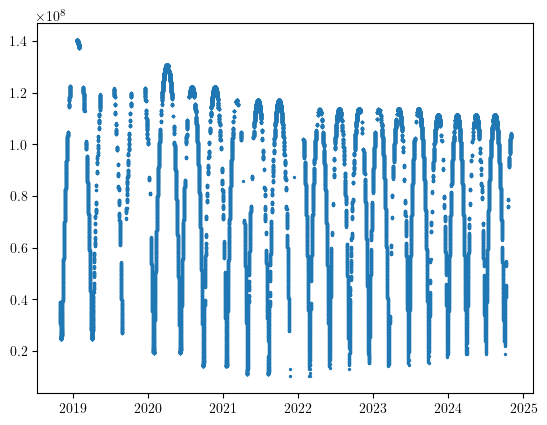

In [7]:
plt.scatter(df_spc["Epoch"], df_spc["sc_r"], s = 2)

In [8]:
# for i in range(len(df_spc["Epoch"])):
#     print(df_spc["Epoch"][i], df_esa["Epoch"][i])

In [9]:
df_spc_clean = df_spc.dropna(subset=["Epoch"]).sort_values("Epoch")
df_esa_clean = df_esa.dropna(subset=["Epoch"]).sort_values("Epoch")
df_merged = pd.merge_asof(
    df_spc_clean.sort_values('Epoch'),
    df_esa_clean.sort_values('Epoch'),
    on='Epoch',
    direction='nearest',         
    tolerance=pd.Timedelta('30m'),
    suffixes = ("_spc", "_esa") 
)

#print(df_merged)

In [10]:
df_clean = df_merged[np.isfinite(df_merged["vp_m_spc"]) & np.isfinite(df_merged["vp_m_esa"])].copy()

Text(0.5, 1.0, 'ESA Merged Data')

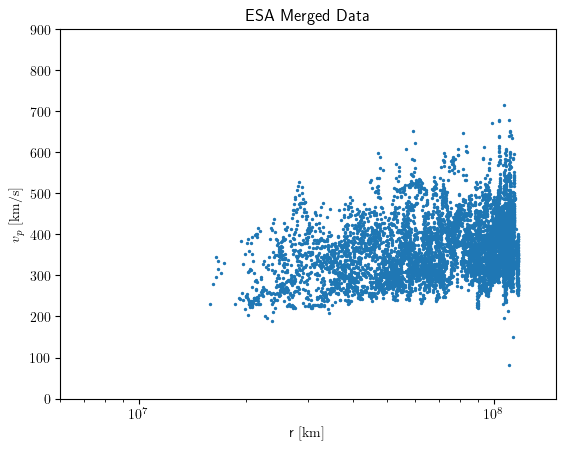

In [11]:
plt.scatter(df_clean["sc_r_esa"], df_clean["vp_m_esa"], s = 2)
plt.xscale("log")
plt.ylabel(r"$v_p~\rm [km/s]$")
plt.xlabel(r"r \rm [km]")
plt.xlim(.6e7, 1.5e8)
plt.ylim(0,900)
plt.title(r"ESA Merged Data")

Text(0.5, 1.0, 'SPC Merged Data')

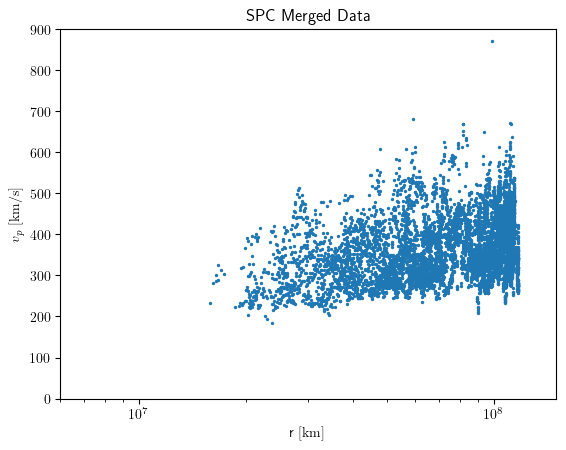

In [12]:
plt.scatter(df_clean["sc_r_spc"], df_clean["vp_m_spc"], s = 2)
plt.xscale("log")
plt.ylabel(r"$v_p~\rm [km/s]$")
plt.xlabel(r"r \rm [km]")
plt.xlim(.6e7, 1.5e8)
plt.ylim(0,900)
plt.title(r"SPC Merged Data")

Pearson r correlation coefficient =  0.9524882969738495


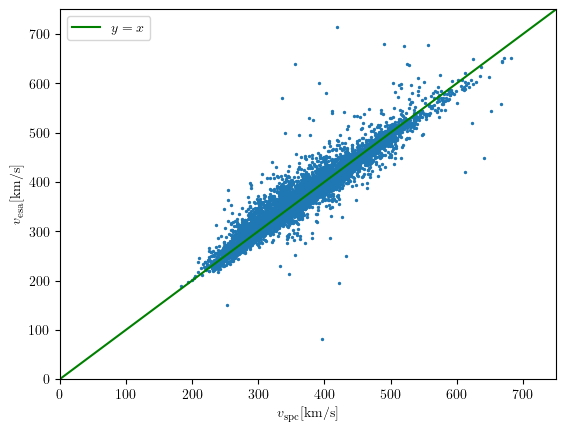

In [13]:
plt.plot(np.linspace(0,900,300), np.linspace(0,900,300), c = "g")
plt.legend([r"$y=x$"])
plt.scatter(df_clean["vp_m_spc"], df_clean["vp_m_esa"], s = 2)
plt.xlabel(r"$v_{\rm spc} \rm [km/s]$")
plt.ylabel(r"$v_{\rm esa} \rm [km/s]$")
plt.xlim(0,750)
plt.ylim(0,750)
print("Pearson r correlation coefficient = ", pearsonr(df_clean["vp_m_spc"], df_clean["vp_m_esa"])[0])


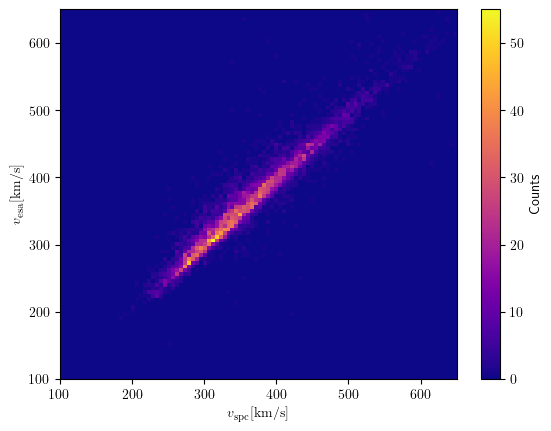

In [14]:
plt.hist2d(df_clean["vp_m_spc"], df_clean["vp_m_esa"], bins=100, cmap="plasma", range=[[100,650],[100,650]])
plt.xlabel(r"$v_{\rm spc} \rm [km/s]$")
plt.ylabel(r"$v_{\rm esa} \rm [km/s]$")
plt.colorbar(label="Counts")
plt.xlim(100,650)
plt.ylim(100,650)
#plt.plot(np.linspace(0,900,300), np.linspace(0,900,300), c = "g",)
plt.show()

(0.0001, 10000.0)

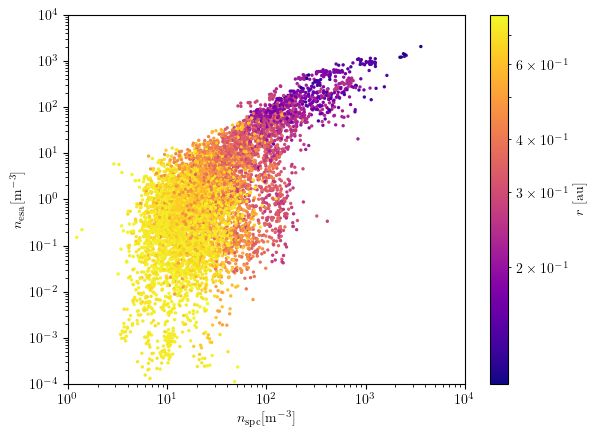

In [15]:

plt.scatter(df_clean["np_spc"], df_clean["np_esa"], s = 2, c = df_clean["sc_r_spc"] / 1.496e8, cmap="plasma", norm="log")
plt.colorbar(label = r"$r~\rm [au]$")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$n_{\rm spc} \rm [m^{-3}]$")
plt.ylabel(r"$n_{\rm esa} \rm [m^{-3}]$")
plt.xlim(1,1e4)
plt.ylim(1e-4,1e4)


In [16]:
print(df_clean.keys())

Index(['ssepoch_spc', 'Epoch', 'np_spc', 'vp_m_spc', 'wp', 'sc_r_spc',
       'ssepoch_esa', 'bm', 'np_esa', 'vp_m_esa', 'Tp', 'sc_r_esa'],
      dtype='object')


In [17]:
import scipy.constants as c

In [18]:
df_clean["Tp_spc"] = 0.5 * c.proton_mass * np.power(df_clean["wp"], 2) / c.Boltzmann

C:\Users\carso\AppData\Local\Temp\ipykernel_37672\2270453970.py:4: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1e3)
C:\Users\carso\AppData\Local\Temp\ipykernel_37672\2270453970.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1e3)


(np.float64(3.553037444745877), 1000.0)

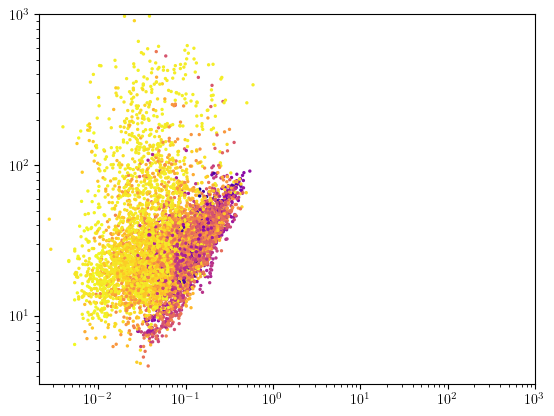

In [19]:
plt.scatter(df_clean["Tp_spc"], df_clean["Tp"], s = 2,  c = df_clean["sc_r_esa"] / 1.496e8, cmap="plasma", norm="log")
plt.yscale("log")
plt.xscale("log")
plt.xlim(0,1e3)
plt.ylim(0,1e3)